# Assignment 06 - Knock Airport Weather
By: _Daniel Finnerty_

The purpose of this notebook is to plot weather data from Knock airport.

Data source: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

## Packages

Import required package for effective operation of notebook.

In [495]:
# Import Pandas for data frames
import pandas as pd

# Import Numpy
import numpy as np

# Import Seaborn for plotting
import seaborn as sns

# Import matplotlib for plot adjustments
import matplotlib as plt

## Data Preparation

Data can be downloaded, converted into a data frame, and printed to confirm it worked.

In [496]:
# Data location
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Read CVS into a data frame, skipping first 23 rows as these are just acronym definitions
df = pd.read_csv(url, skiprows=23)

# Show first 5 rows
df.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_40612\4252194692.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


It can be seen that the first timestamp is on April 10th, with the next on July 31st. This could cause some issues later, so may have to be removed as an outlier.

In [497]:
# Show last 5 rows
df.tail()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
256429,31-oct-2025 20:00,0,0.0,0,8.6,0,7.8,6.8,9.9,89,...,2,13,2,160,,,0.0,35000,90,8
256430,31-oct-2025 21:00,0,0.0,0,8.3,0,7.8,7.2,10.2,93,...,2,13,2,160,,,0.0,22000,90,8
256431,31-oct-2025 22:00,0,0.5,0,7.8,0,7.6,7.3,10.3,97,...,2,10,2,160,,,0.0,6000,43,8
256432,31-oct-2025 23:00,0,0.8,0,7.4,0,7.3,7.2,10.1,99,...,2,8,2,160,,,0.0,9000,46,8
256433,01-nov-2025 00:00,0,0.2,0,7.4,0,7.4,7.3,10.3,100,...,2,7,2,190,,,0.0,25000,1,8


In [498]:
# Show dataframe details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256434 entries, 0 to 256433
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    256434 non-null  object 
 1   ind     256434 non-null  int64  
 2   rain    256434 non-null  object 
 3   ind.1   256434 non-null  int64  
 4   temp    256434 non-null  float64
 5   ind.2   256434 non-null  int64  
 6   wetb    256434 non-null  float64
 7   dewpt   256434 non-null  float64
 8   vappr   256434 non-null  float64
 9   rhum    256434 non-null  int64  
 10  msl     256434 non-null  object 
 11  ind.3   256434 non-null  int64  
 12  wdsp    256434 non-null  object 
 13  ind.4   256434 non-null  int64  
 14  wddir   256434 non-null  object 
 15  ww      256434 non-null  object 
 16  w       256434 non-null  object 
 17  sun     256434 non-null  float64
 18  vis     256434 non-null  object 
 19  clht    256434 non-null  object 
 20  clamt   256434 non-null  object 
dtypes: float64

It can be seen from above that there are a significant number of entries in the data. This is due to the hourly records every day since July 31st 1996.

## Plots

#### <u>Plot 1: Temperature</u>

To plot the temperature, the date and temp column data will be used.

In [499]:
# Show 'date' column
df["date"]

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
256429    31-oct-2025 20:00
256430    31-oct-2025 21:00
256431    31-oct-2025 22:00
256432    31-oct-2025 23:00
256433    01-nov-2025 00:00
Name: date, Length: 256434, dtype: object

In [500]:
# Convert the date and time to a common datetime format.
pd.to_datetime(df['date'])

C:\Users\danie\AppData\Local\Temp\ipykernel_40612\1552468541.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
256429   2025-10-31 20:00:00
256430   2025-10-31 21:00:00
256431   2025-10-31 22:00:00
256432   2025-10-31 23:00:00
256433   2025-11-01 00:00:00
Name: date, Length: 256434, dtype: datetime64[ns]

This can be seen to convert the timestamp to YYYY-MM-DD HH:MM:SS. It can then be applied to the data frame.

In [501]:
# Apply new datetime format to data frame.
df["date"]= pd.to_datetime(df['date'])

C:\Users\danie\AppData\Local\Temp\ipykernel_40612\4134044819.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


In [502]:
# Show first 5 rows to confirm.
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


A lineplot can now be created of the recorded temperatures ('temp' column).

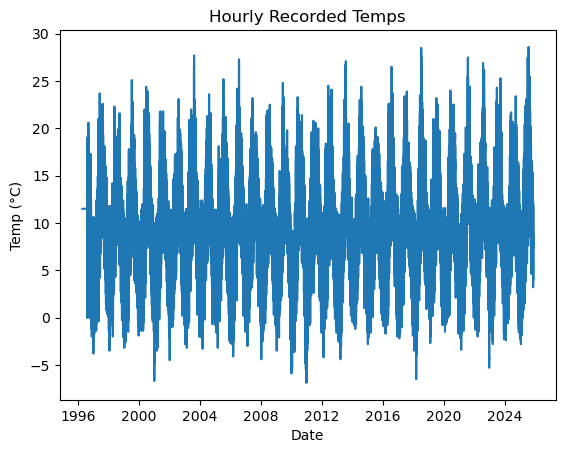

In [503]:
# Use seaborn to create lineplot, specifying date on x-axis, and temp on y-axis
ax = sns.lineplot(data=df, x="date", y="temp")

# Specify plot title
ax.set_title('Hourly Recorded Temps')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Temp (°C)');

#### <u>Plot 2: Mean Daily Temperature</u>

To determine the mean daily temperature, firstly the date recordings can be specified as the data frame index.

In [504]:
# Set 'data' column as the data frame index.
df.set_index('date', inplace=True)

# Show first 3 rows
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


As noted earlier, given the first timestamp is such an outlier, it will be removed.

In [505]:
# Get index of first row
# Source: https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
i = df[(df.index == '1996-04-10 14:00:00')].index

# drop 'i' row
df_rev = df.drop(i)

# Show
df_rev.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6
1996-07-31 12:00:00,0,0.0,0,14.4,0,10.9,7.3,0.0,0,1010.9,0,0,0,0,1,82,0.0,40000,43,6


It can be seen to have been removed, and now the mean for each date can be determined.

In [506]:
# Determing the daily ('D') mean, 
daily_temp = df_rev["temp"].resample("D").mean().reset_index(name='meant')

# Show first 5 rows
daily_temp.head()

,date,meant
0,1996-07-31,12.650000
1,1996-08-01,11.666667
2,1996-08-02,12.504167
3,1996-08-03,14.266667
4,1996-08-04,13.987500


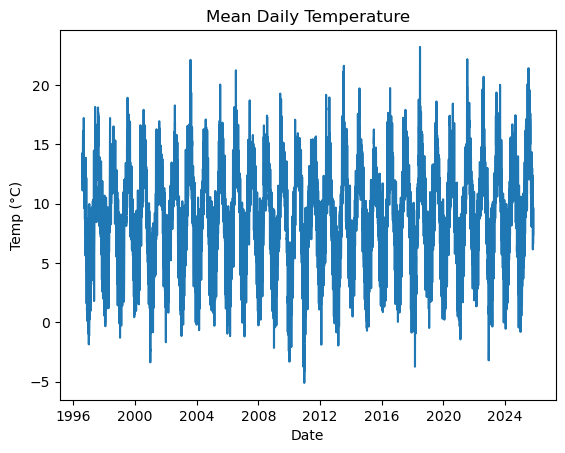

In [507]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=daily_temp, x="date", y="meant")

# Specify plot title
ax.set_title('Mean Daily Temperature')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Temp (°C)');

#### <u>Plot 3: Mean Monthly Temperature</u>

As with the daily temperatures, the mean monthly temps can be determines in the same manner.

In [508]:
# Calculate the monthly (MS) mean temperature and create new column 'meant' with the results. 
monthly_temp = df_rev["temp"].resample("MS").mean().reset_index(name='meant')

# Show first 5 rows
monthly_temp.head()

,date,meant
0,1996-07-01,12.650000
1,1996-08-01,12.946909
2,1996-09-01,12.174306
3,1996-10-01,9.614113
4,1996-11-01,4.909444


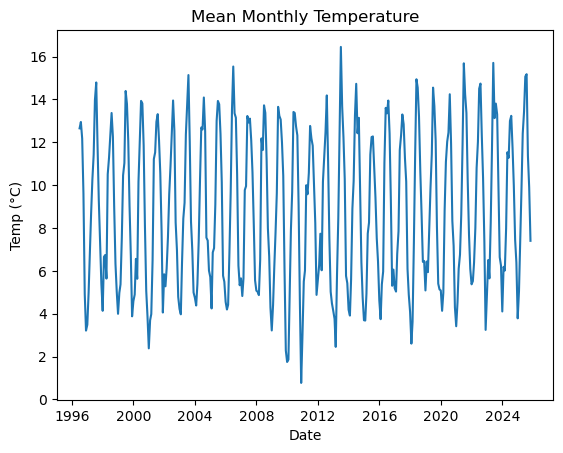

In [509]:
# Create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=monthly_temp, x="date", y="meant")

# Specify plot title
ax.set_title('Mean Monthly Temperature')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Temp (°C)');

#### <u>Plot 4: Windspeed</u>

For plotting the windspeed (wdsp) it can be seen that there are some blank data points.

In [510]:
# Show specific rows
df.iloc[1862:1872]

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-10-16 21:00:00,0,0.0,0,4.9,0,4.6,4.2,8.2,95,1003.4,2,6,2,230,2,11,4.9,40000,999,3
1996-10-16 22:00:00,0,0.0,0,5.6,0,5.3,4.9,8.7,95,1003.4,2,6,2,230,2,11,4.9,40000,43,5
1996-10-16 23:00:00,0,0.0,0,4.8,0,4.4,3.8,8.0,94,1003.7,2,3,2,190,2,11,4.9,40000,999,1
1996-10-17 00:00:00,8,,0,5.3,0,4.9,4.4,8.3,94,1003.5,7,,7,,2,11,4.9,40000,999,1
1996-10-17 01:00:00,8,,0,6.1,0,5.7,5.2,8.8,94,1003.8,7,,7,,25,81,0.0,40000,999,3
1996-10-17 02:00:00,8,,0,5.8,0,5.6,5.3,8.9,97,1004.0,7,,7,,25,81,0.0,40000,999,4
1996-10-17 03:00:00,3,0.0,0,5.3,0,5.1,4.8,8.6,97,1003.8,2,6,2,200,1,81,0.0,40000,999,2
1996-10-17 04:00:00,8,,0,4.6,0,4.4,4.1,8.2,97,1003.8,7,,7,,2,11,0.0,40000,999,3
1996-10-17 05:00:00,0,0.1,0,4.7,0,4.7,4.7,8.5,100,1003.7,2,4,2,190,25,81,0.0,40000,999,3


To resolve this before plotting, the information can either be backfilled (the next credible data is populated into the empty cells), or forward filled (the previous data is filled into the empty cells). In this case the cells will be forward filled.

The first step is to replace all empty cells with 'NaN'.

In [511]:
# Replace all blanks with NaN
# Source: https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
df_rev["wdsp"].replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Show specified row range.
df_rev.iloc[1862:1872]

C:\Users\danie\AppData\Local\Temp\ipykernel_40612\3543225112.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rev["wdsp"].replace(r'^\s*$', np.nan, regex=True, inplace=True)


,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-10-16 22:00:00,0,0.0,0,5.6,0,5.3,4.9,8.7,95,1003.4,2,6,2,230,2,11,4.9,40000,43,5
1996-10-16 23:00:00,0,0.0,0,4.8,0,4.4,3.8,8.0,94,1003.7,2,3,2,190,2,11,4.9,40000,999,1
1996-10-17 00:00:00,8,,0,5.3,0,4.9,4.4,8.3,94,1003.5,7,NaN,7,,2,11,4.9,40000,999,1
1996-10-17 01:00:00,8,,0,6.1,0,5.7,5.2,8.8,94,1003.8,7,NaN,7,,25,81,0.0,40000,999,3
1996-10-17 02:00:00,8,,0,5.8,0,5.6,5.3,8.9,97,1004.0,7,NaN,7,,25,81,0.0,40000,999,4
1996-10-17 03:00:00,3,0.0,0,5.3,0,5.1,4.8,8.6,97,1003.8,2,6,2,200,1,81,0.0,40000,999,2
1996-10-17 04:00:00,8,,0,4.6,0,4.4,4.1,8.2,97,1003.8,7,NaN,7,,2,11,0.0,40000,999,3
1996-10-17 05:00:00,0,0.1,0,4.7,0,4.7,4.7,8.5,100,1003.7,2,4,2,190,25,81,0.0,40000,999,3
1996-10-17 06:00:00,3,0.0,0,3.8,0,3.8,3.8,8.0,100,1003.7,2,5,2,150,46,81,0.0,500,0,5


It can be seen now that the wind speed column either contains measurements, or 'NaN'. This now allows backfill to be applied.

In [512]:
# Backfill all cells where 'NaN' occur in the 'wdsp' column.
df_rev['wdsp'].bfill(inplace=True)

C:\Users\danie\AppData\Local\Temp\ipykernel_40612\885465148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rev['wdsp'].bfill(inplace=True)


In [513]:
# Show specific rows to confirm it worked.
df_rev.iloc[1862:1872]

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-10-16 22:00:00,0,0.0,0,5.6,0,5.3,4.9,8.7,95,1003.4,2,6,2,230,2,11,4.9,40000,43,5
1996-10-16 23:00:00,0,0.0,0,4.8,0,4.4,3.8,8.0,94,1003.7,2,3,2,190,2,11,4.9,40000,999,1
1996-10-17 00:00:00,8,,0,5.3,0,4.9,4.4,8.3,94,1003.5,7,6,7,,2,11,4.9,40000,999,1
1996-10-17 01:00:00,8,,0,6.1,0,5.7,5.2,8.8,94,1003.8,7,6,7,,25,81,0.0,40000,999,3
1996-10-17 02:00:00,8,,0,5.8,0,5.6,5.3,8.9,97,1004.0,7,6,7,,25,81,0.0,40000,999,4
1996-10-17 03:00:00,3,0.0,0,5.3,0,5.1,4.8,8.6,97,1003.8,2,6,2,200,1,81,0.0,40000,999,2
1996-10-17 04:00:00,8,,0,4.6,0,4.4,4.1,8.2,97,1003.8,7,4,7,,2,11,0.0,40000,999,3
1996-10-17 05:00:00,0,0.1,0,4.7,0,4.7,4.7,8.5,100,1003.7,2,4,2,190,25,81,0.0,40000,999,3
1996-10-17 06:00:00,3,0.0,0,3.8,0,3.8,3.8,8.0,100,1003.7,2,5,2,150,46,81,0.0,500,0,5


In [514]:
# Convert all 'Value' numbers to 64-bit integers
df_rev['wdsp']=df_rev['wdsp'].astype('int64')


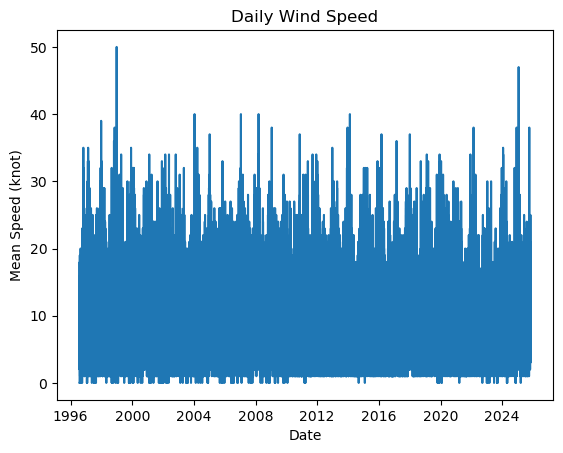

In [515]:
# Create lineplot of daily wind speed.
ax = sns.lineplot(data=df_rev, x="date", y="wdsp");

# Specify plot title
ax.set_title('Daily Wind Speed')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Mean Speed (knot)');

#### <u>Plot 5: Windspeed over 24 Hours</u>

For this, a random 24 hour period is selected. A lineplot can them be created, specifying to occur within the range.

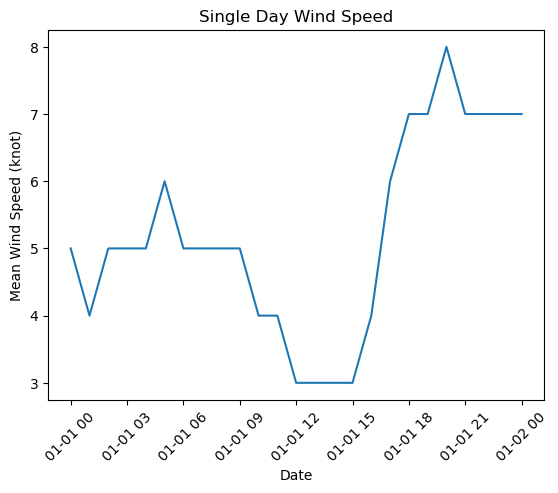

In [516]:
# Specify start date and time
dateFrom = "2010-01-01 00:00:00"

# Specify end date and time
dateTo = "2010-01-02 00:00:00"

# Create lineplot
ax = sns.lineplot(data=df_rev.loc[dateFrom:dateTo], x="date", y="wdsp");

# Specify plot title
ax.set_title('Single Day Wind Speed')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Mean Wind Speed (knot)')

# Rotate axis test
# Source: https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
ax.tick_params(axis='x', labelrotation=45);

#### <u>Plot 6: Daily Max Windspeed</u>

In [517]:
# Determine max wind speed for each day
df_maxwdsp = df_rev["wdsp"].resample("B").max()

# Show first 5 rows
df_maxwdsp.head()

date
1996-07-31     0
1996-08-01    14
1996-08-02    18
1996-08-05    14
1996-08-06    19
Freq: B, Name: wdsp, dtype: int64

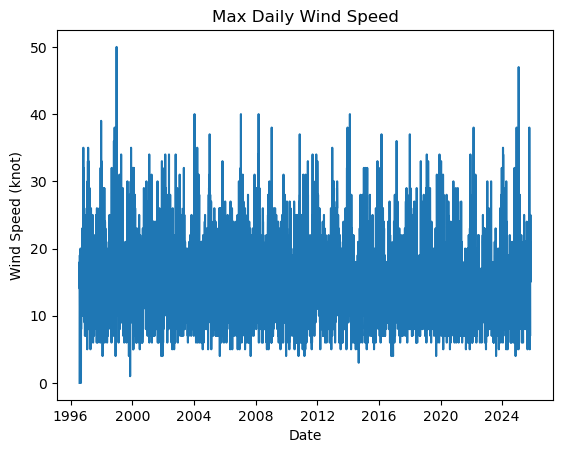

In [518]:
# Create lineplot
ax = sns.lineplot(data=df_maxwdsp)

# Specify plot title
ax.set_title('Max Daily Wind Speed')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (knot)');

#### <u>Plot 7: Monthly Mean of Max Daily Wind Speed</u>

For this, firslty the data frame will be simplified by removing all the unnecessary columns.

In [519]:
# Comfirm all column names
headers = df_rev.columns.tolist()

# Show list
headers

['ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

In [520]:
# Remove unrequired columns
drop_col_list = ['ind','rain','ind.1','temp','ind.2','wetb','dewpt','vappr','rhum','msl','ind.3','ind.4','wddir','ww','w','sun','vis','clht','clamt']
df_rev.drop(columns=drop_col_list, inplace=True)

# Show first 5 rows.
df_rev.head()

,wdsp
date,
1996-07-31 08:00:00,0
1996-07-31 09:00:00,0
1996-07-31 10:00:00,0
1996-07-31 11:00:00,0
1996-07-31 12:00:00,0


Next, the maximum wind speed for each day ('D@) can be determined.

In [521]:
# Determine max wind speed for each day ('D')
daily_max = df_rev["wdsp"].resample("D").max()

# Show first 5 rows
daily_max.head()

date
1996-07-31     0
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
Freq: D, Name: wdsp, dtype: int64

With this done, the index column can be reset for plotting.

In [522]:
# Set date column as index
daily_max = daily_max.reset_index()

# Show first 5 rows
daily_max.head()

,date,wdsp
0,1996-07-31,0
1,1996-08-01,14
2,1996-08-02,13
3,1996-08-03,10
4,1996-08-04,18


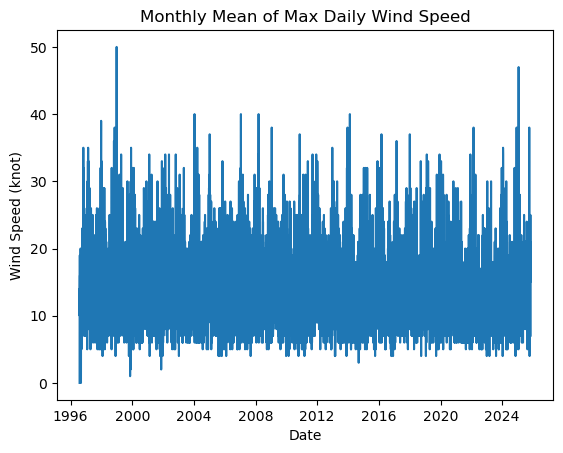

In [523]:
# Create lineplot
ax = sns.lineplot(data=daily_max, x="date", y="wdsp")

# Specify plot title
ax.set_title('Monthly Mean of Max Daily Wind Speed')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (knot)');

# End